In [1]:
# Dependencies
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
from config import api_key

In [2]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [9]:
cities = ["Paris", "London", "Oslo", "Beijing", "Mumbai", "Manila", "New York", "Seattle", "Dallas", "Taipei", "Not a real city that I made up"]

# set up lists to hold reponse info
cities_found = []
lat = []
temp = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    
    try:
        
        print("Found city: " + city)
        
        response = requests.get(query_url + city).json()

        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        
        cities_found.append(city)
        
    except:
        print("Error: " + city)
    

print(f"The latitude information received is: {lat}")
print(f"The temperature information received is: {temp}")

Found city: Paris
Found city: London
Found city: Oslo
Found city: Beijing
Found city: Mumbai
Found city: Manila
Found city: New York
Found city: Seattle
Found city: Dallas
Found city: Taipei
Found city: Not a real city that I made up
Error: Not a real city that I made up
The latitude information received is: [48.8534, 51.5085, 59.9127, 39.9075, 19.0144, 14.6042, 40.7143, 47.6062, 32.7668, 25.0478]
The temperature information received is: [10.52, 8.52, 6.22, 16.61, 29.99, 31.43, 12.56, 8.64, 25.21, 28.33]


In [10]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "city": cities_found,
    "lat": lat,
    "temp": temp
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,city,lat,temp
0,Paris,48.8534,10.52
1,London,51.5085,8.52
2,Oslo,59.9127,6.22
3,Beijing,39.9075,16.61
4,Mumbai,19.0144,29.99
5,Manila,14.6042,31.43
6,New York,40.7143,12.56
7,Seattle,47.6062,8.64
8,Dallas,32.7668,25.21
9,Taipei,25.0478,28.33


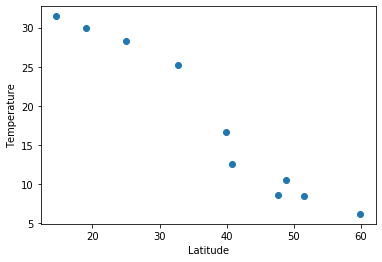

In [11]:
# Create a Scatter Plot for temperature vs latitude
x_values = weather_data['lat']
y_values = weather_data['temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

In [6]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0    12.451923
1    11.205502
2     7.260201
3    16.651522
4    26.459662
5    28.530004
6    16.272774
7    13.037413
8    20.003680
9    23.627319
Name: lat, dtype: float64


In [7]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.47x +35.39


The r-value is: 0.7082287829525071


/Users/billparker/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/billparker/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/billparker/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


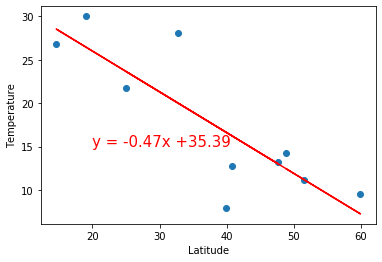

In [8]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

In [9]:
# Calculate the temperature for Florence at 43.77 degrees
florence_lat = 43.77
florence_predicted_temp = round(slope * florence_lat + intercept,2)
                                
print(f"The Predicted temperature for Florence will be {florence_predicted_temp}.")

The Predicted temperature for Florence will be 14.84.


In [10]:
# Use API to determine actual temperature
response = requests.get(query_url + "Florence").json()
florence_actual_temp = response['main']['temp']

print(f"The actual temperature of Florence is {florence_actual_temp}")

The actual temperature of Florence is 12.77
